In [1]:
import cv2
import numpy as np
import pandas as pd

### Creating own dataset using mouse click bar

In [9]:
dataset = []
def draw(event,x,y,flag,param):
    if event == cv2.EVENT_FLAG_LBUTTON:
        dataset.append((x,y,0))
        cv2.circle(img,(x,y),5,(255,0,0),3)
    if event == cv2.EVENT_FLAG_RBUTTON:
        dataset.append((x,y,1))
        cv2.circle(img,(x,y),5,(0,255,0),3) 

In [10]:
img = np.zeros((255,255,3),np.uint8)
cv2.namedWindow("window name",cv2.WINDOW_NORMAL)
cv2.setMouseCallback("window name",draw)

while True:
    cv2.imshow("window name",img)
    if cv2.waitKey(1) & 255 == ord ("q"):
        break
cv2.destroyAllWindows()

### Creating DataFrame 

In [11]:
df = pd.DataFrame(dataset)

In [12]:
df

,0,1,2
0,19,22,0
1,21,34,0
2,38,46,0
3,42,33,0
4,22,20,0
...,...,...,...
442,234,109,1
443,254,94,1
444,194,103,1
445,210,115,1


In [14]:
df.rename(columns = {0: "x" , 1: "y",2:"label"},inplace = True)

In [15]:
df.head()

,x,y,label
0,19,22,0
1,21,34,0
2,38,46,0
3,42,33,0
4,22,20,0


### Saving dataset as csv file

In [17]:
df.to_csv('own_dataset.csv', index=False)

In [4]:
df = pd.read_csv(r"own_dataset.csv")
df.head()

,x,y,label
0,19,22,0
1,21,34,0
2,38,46,0
3,42,33,0
4,22,20,0


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   x       447 non-null    int64
 1   y       447 non-null    int64
 2   label   447 non-null    int64
dtypes: int64(3)
memory usage: 10.6 KB


In [6]:
# Checking whether Target feature is balanced or not
df['label'].value_counts()

0    234
1    213
Name: label, dtype: int64

### Identifying Input and Output features

In [7]:
# Input features 
x = df.iloc[:,0:2]

# Output feature
y = df.iloc[:,2].astype(int)


In [8]:
x.head()

,x,y
0,19,22
1,21,34
2,38,46
3,42,33
4,22,20


In [9]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int32

### Splitting into train and test

In [10]:
 from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15)

C:\Users\ADMIN\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [11]:
x_train.shape


(379, 2)

In [12]:
x_test.shape

(68, 2)

### Standardizing numerical features

In [13]:
# As it is Numerical features in different scaling therefore applying Standardization
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x_trainp = std.fit_transform(x_train)
x_testp = std.transform(x_test)

### Building Logical structure

In [26]:
import keras
from keras import Sequential
from keras.layers import Dense,Dropout,BatchNormalization
from keras.regularizers import L1,L2,L1L2
from keras.optimizers import SGD
import matplotlib.pyplot as plt

In [29]:
model = Sequential()
model.add(Dense(10,activation='relu',kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001),input_dim = 2))
model.add(Dense(8,activation='relu',kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001)))
model.add(Dense(1,activation='sigmoid',kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001))) 


### Observation 

#. Here i have used the relu activation Funation to aviod the Negative(-ve) values.                                             
#. Regularization is used as Lasso with 0.001 Learning rate.                                                                     
#. As traget variable contains binary class, In output layer i have used the sigmoid activatio function

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                30        
                                                                 
 dense_4 (Dense)             (None, 8)                 88        
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 127 (508.00 Byte)
Trainable params: 127 (508.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### compiling the model 

In [31]:
model.compile(loss='binary_crossentropy',optimizer = SGD(learning_rate=0.1),metrics = ['accuracy'])
his = model.fit(x_trainp,y_train,batch_size=15,epochs = 20,validation_split=0.1)

Epoch 1/20
23/23 [==============================] - 1s 19ms/step - loss: 0.6768 - accuracy: 0.6393 - val_loss: 0.5746 - val_accuracy: 0.9474
Epoch 2/20
23/23 [==============================] - 0s 5ms/step - loss: 0.5428 - accuracy: 0.9179 - val_loss: 0.4559 - val_accuracy: 0.8947
Epoch 3/20
23/23 [==============================] - 0s 7ms/step - loss: 0.4072 - accuracy: 0.9238 - val_loss: 0.3413 - val_accuracy: 0.9211
Epoch 4/20
23/23 [==============================] - 0s 5ms/step - loss: 0.2989 - accuracy: 0.9326 - val_loss: 0.2688 - val_accuracy: 0.9211
Epoch 5/20
23/23 [==============================] - 0s 5ms/step - loss: 0.2350 - accuracy: 0.9443 - val_loss: 0.2304 - val_accuracy: 0.9211
Epoch 6/20
23/23 [==============================] - 0s 5ms/step - loss: 0.2066 - accuracy: 0.9355 - val_loss: 0.2095 - val_accuracy: 0.9211
Epoch 7/20
23/23 [==============================] - 0s 6ms/step - loss: 0.1913 - accuracy: 0.9355 - val_loss: 0.1935 - val_accuracy: 0.9211
Epoch 8/20
23/23 [=

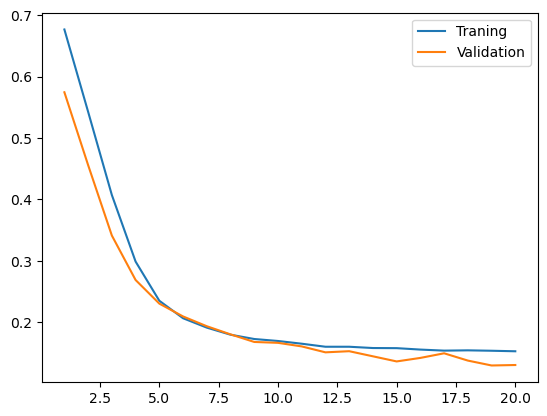

In [32]:
# Plotting train Loss and validation loss
plt.plot(range(1,21),his.history["loss"], label = 'Traning')
plt.plot(range(1,21),his.history["val_loss"],label = 'Validation')
plt.legend()

### Predicting the model

In [33]:
predicted = model.predict(x_testp)
predicted = np.where(predicted>0.5,1,0)


3/3 [==============================] - 0s 5ms/step


In [34]:
predicted

array([[1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0]])

### Evaluating the Model

In [36]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
print(accuracy_score(y_test,predicted))  


0.9264705882352942


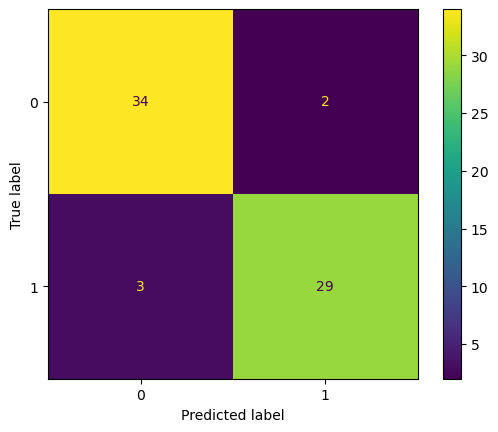

In [37]:
cm=confusion_matrix(y_test,predicted)
va=ConfusionMatrixDisplay(cm)
va.plot() 
plt.show()


### plotting the decision surface 

In [42]:
from mlxtend.plotting import plot_decision_regions


9600/9600 [==============================] - 24s 2ms/step


<AxesSubplot:>

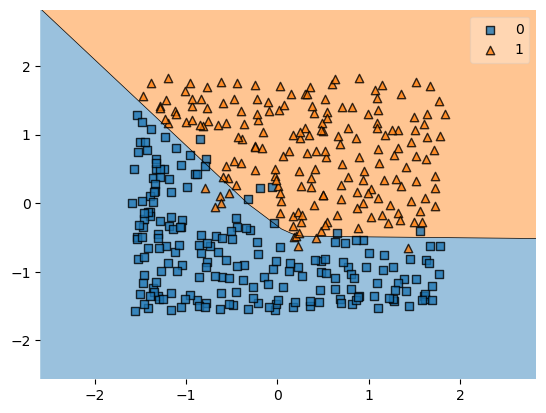

In [43]:
plot_decision_regions(x_trainp,y_train.values,clf = model)


9600/9600 [==============================] - 22s 2ms/step


<AxesSubplot:>

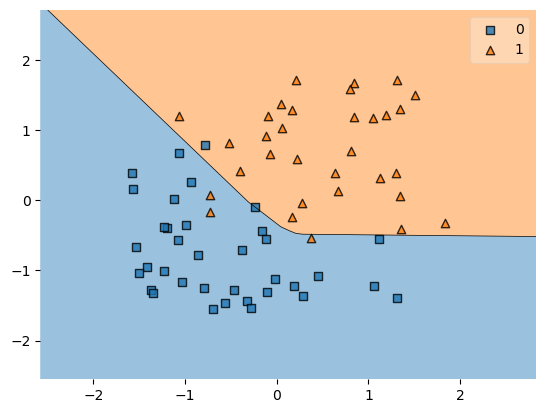

In [44]:
plot_decision_regions(x_testp,y_test.values,clf=model)  


### Conclusions:
> This neural network model achieves an accuracy of 92%.


### The model architecture consists of 2 hidden layers as following:
>In the first hidden layer, there are 10 neurons with the relu activation function

>In the second hidden layer, there are 8 neurons with the relu activation function

>The output layer uses the sigmoid activation function.




### In model compilation,
> Loss function is Binary cross-entropy.     


> Optimizer: Stochastic Gradient Descent (SGD) with a batch size of 15 and a learning rate of 0.001.                             


>The model was trained for 20 epochs.                                                                                            
 